In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import cv2

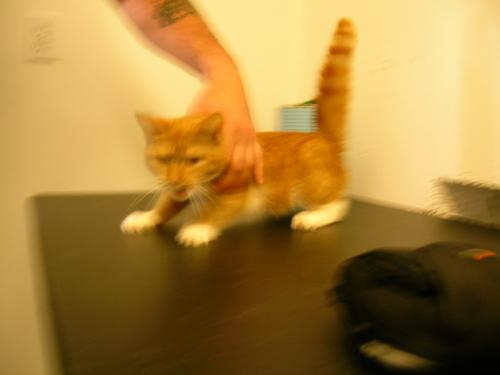

In [4]:
image.load_img('Test/Testing/Cat/0.jpg')

In [5]:
cv2.imread('Test/Testing/Cat/0.jpg').shape

(375, 500, 3)

In [6]:
train=ImageDataGenerator(rescale=1/255)
valid=ImageDataGenerator(rescale=1/255)

In [7]:
train_data=train.flow_from_directory('Test/Training/',batch_size=32,class_mode='binary',target_size=(200,200))

Found 23784 images belonging to 2 classes.


In [8]:
valid_data=valid.flow_from_directory('Test/Validation/',batch_size=32,class_mode='binary',target_size=(200,200))

Found 608 images belonging to 2 classes.


In [9]:
train_data.class_indices

{'Cat': 0, 'Dog': 1}

In [10]:
train_data.classes

array([0, 0, 0, ..., 1, 1, 1])

In [11]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [12]:
model=Sequential()

In [13]:
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [100]:
model.fit(train_data,steps_per_epoch=5,epochs=50,validation_data=valid_data)

Epoch 1/50
5/5 [==============================] - 4s 817ms/step - loss: 0.3264 - accuracy: 0.8813 - val_loss: 0.4613 - val_accuracy: 0.8174
Epoch 2/50
5/5 [==============================] - 4s 795ms/step - loss: 0.2787 - accuracy: 0.8875 - val_loss: 0.4826 - val_accuracy: 0.8026
Epoch 3/50
5/5 [==============================] - 4s 804ms/step - loss: 0.3800 - accuracy: 0.8313 - val_loss: 0.4907 - val_accuracy: 0.7812
Epoch 4/50
5/5 [==============================] - 4s 807ms/step - loss: 0.4278 - accuracy: 0.8313 - val_loss: 0.4932 - val_accuracy: 0.7928
Epoch 5/50
5/5 [==============================] - 4s 813ms/step - loss: 0.3272 - accuracy: 0.8562 - val_loss: 0.4841 - val_accuracy: 0.7895
Epoch 6/50
5/5 [==============================] - 4s 804ms/step - loss: 0.3768 - accuracy: 0.8313 - val_loss: 0.4756 - val_accuracy: 0.7961
Epoch 7/50
5/5 [==============================] - 4s 797ms/step - loss: 0.3063 - accuracy: 0.8750 - val_loss: 0.4730 - val_accuracy: 0.7977
Epoch 8/50
5/5 [====

In [101]:
#test_data='Test/Testing/'

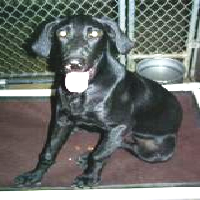

In [102]:
image.load_img('Test/Testing/Dog/50.jpg',target_size=(200,200))

In [103]:
img=image.load_img('Test/Testing/Dog/50.jpg',target_size=(200,200))

In [104]:
x=image.img_to_array(img)

In [105]:
x=np.expand_dims(x,axis=0)

In [106]:
img=np.vstack([x])

In [107]:
val=model.predict( img)
if val==0:
    print("----Cat----")
else :
    print("----Dog----")


1/1 [==============================] - 0s 26ms/step
----Dog----


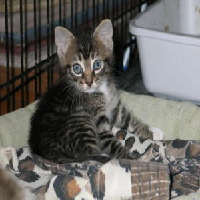

In [120]:
image.load_img('Test/Testing/Cat/12.jpg',target_size=(200,200))

In [121]:
img=image.load_img('Test/Testing/Cat/12.jpg',target_size=(200,200))

In [122]:
x=image.img_to_array(img)

In [123]:
x=np.expand_dims(x,axis=0)

In [124]:
img=np.vstack([x])

In [125]:
val=model.predict( img)
if val==0:
    print("----Cat----")
else :
    print("----Dog----")

1/1 [==============================] - 0s 26ms/step
----Cat----


In [126]:
import pickle

In [127]:
pickle.dump(model, open('Cat vs Dog', 'wb'))

INFO:tensorflow:Assets written to: ram://cf8fa0d0-7230-4837-be3c-fbf77eda4ebb/assets


INFO:tensorflow:Assets written to: ram://cf8fa0d0-7230-4837-be3c-fbf77eda4ebb/assets
